<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/F25_Class_06_1_CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 6: Reinforcement Learning**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* **Part 6.1: Introduction to Introduction to Gymnasium and Q-Learning**
* Part 6.2: Stable Baselines Q-Learning
* Part 6.3: Atari Games with Stable Baselines Neural Networks
* Part 6.4: Future of Reinforcement Learning


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


Make sure your GMAIL address is included as the last line in the output above.

### Install Gymnasium

Before we can beging, we need to install Hugging Face datasets by running the code in the next cell.

In [ ]:
# Install gymnasium

!pip install gymnasium[atari] > /dev/null
!pip install pyvirtualdisplay > /dev/null
!sudo DEBIAN_FRONTEND=noninteractive apt-get install -y xvfb ffmpeg > /dev/null


### Install Custom Functions

Run the cell below to load custom functions used in this lesson.

In [ ]:
# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# **Introduction to Gymnasium and Q-Learning**

## **Gymnasium**

**Gymnasium** is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It provides various environments that simulate different tasks and challenges, which agents (algorithms) can interact with to learn and improve their performance.

### **How Gymnasium Can Be Useful for Computational Biologists**

Gymnasium can be a valuable tool for computational biologists in several ways. Here are some potential applications:

##### **1. Modeling Biological Systems**
Gymnasium provides a platform for simulating and modeling complex biological systems. Computational biologists can use Gymnasium environments to create and test models of cellular processes, metabolic pathways, and genetic networks. This helps in understanding the dynamics of these systems and predicting their behavior under different conditions.

##### **2. Reinforcement Learning for Drug Discovery**
Reinforcement learning (RL) algorithms can be applied to drug discovery and development. By using Gymnasium environments, computational biologists can train RL agents to explore chemical spaces, optimize molecular structures, and predict the efficacy of potential drug candidates. This accelerates the drug discovery process and reduces the need for costly and time-consuming experiments.

##### **3. Optimization of Experimental Protocols**
Gymnasium can be used to optimize experimental protocols in computational biology. For example, RL agents can be trained to design efficient experimental setups, select optimal parameters, and minimize experimental errors. This leads to more accurate and reproducible results in biological research.

##### **4. Simulating Evolutionary Processes**
Gymnasium environments can simulate evolutionary processes, allowing computational biologists to study the evolution of populations, genetic diversity, and adaptation mechanisms. By modeling these processes, researchers can gain insights into the principles of evolution and apply them to areas such as conservation biology and synthetic biology.

##### **5. Analyzing Biological Data**
Gymnasium can be integrated with data analysis tools to analyze large-scale biological data. Computational biologists can use Gymnasium environments to preprocess, visualize, and interpret data from genomics, proteomics, and other omics studies. This helps in identifying patterns, correlations, and potential biomarkers.

##### **6. Training and Education**
Gymnasium can be used as an educational tool to teach computational biology concepts. Students and researchers can interact with Gymnasium environments to learn about biological systems, experiment with different algorithms, and gain hands-on experience in computational modeling and simulation.

### **Example Use Case: Protein Folding**
One specific application is the study of protein folding. Computational biologists can use Gymnasium to create environments that simulate the folding process of proteins. RL agents can be trained to predict the final folded structure of a protein based on its amino acid sequence. This has significant implications for understanding diseases related to protein misfolding and designing therapeutic interventions.

By leveraging Gymnasium, computational biologists can enhance their research capabilities, accelerate discoveries, and gain deeper insights into the complexities of biological systems.

## **Q-Learning**


Q-Learning is a foundational technology upon which deep reinforcement learning is based. Before we explore deep reinforcement learning, it is essential to understand Q-Learning. Several components make up any Q-Learning system.

1. **Agent** - The agent is an entity that exists in an environment that takes actions to affect the state of the environment, to receive rewards.
2. **Environment** - The environment is the universe that the agent exists in. The environment is always in a specific state that is changed by the agent's actions.
3. **Actions** - Steps that the agent can perform to alter the environment
4. **Step** - A step occurs when the agent performs an action and potentially changes the environment state.
5. **Episode** - A chain of steps that ultimately culminates in the environment entering a terminal state.
6. **Epoch** - A training iteration of the agent that contains some number of episodes.
7. **Terminal State** -  A state in which further actions do not make sense. A terminal state occurs when the agent has one, lost, or the environment exceeds the maximum number of steps in many environments.

Q-Learning works by building a table that suggests an action for every possible state. This approach runs into several problems. First, the environment is usually composed of several continuous numbers, resulting in an infinite number of states. Q-Learning handles continuous states by binning these numeric values into ranges.

Out of the box, Q-Learning does not deal with continuous inputs, such as a car's accelerator that can range from released to fully engaged. Additionally, Q-Learning primarily deals with discrete actions, such as pressing a joystick up or down. Researchers have developed clever tricks to allow Q-Learning to accommodate continuous actions.

Deep neural networks can help solve the problems of continuous environments and action spaces. In the next section, we will learn more about deep reinforcement learning. For now, we will apply regular Q-Learning to the Mountain Car problem from OpenAI Gym.



### Example 1: Introducing the Mountain Car

This section will demonstrate how Q-Learning can create a solution to the mountain car gym environment. The Mountain car is an environment where a car must climb a mountain. Because gravity is stronger than the car's engine, it cannot merely accelerate up the steep slope even with full throttle. The vehicle is situated in a valley and must learn to utilize potential energy by driving up the opposite hill before the car can make it to the goal at the top of the rightmost hill.

First, it might be helpful to visualize the mountain car environment. The following code shows this environment. This code makes use of TF-Agents to perform this render. Usually, we use TF-Agents for the type of deep reinforcement learning that we will see in the next module. However, TF-Agents is just used to render the mountain care environment for now.

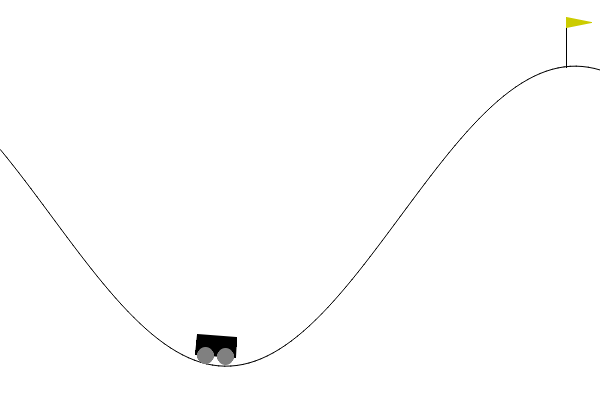

In [ ]:
# Example 1: Introduce Mountain Car

import gymnasium as gym
from PIL import Image
from IPython.display import display

# Function to display the environment's state as an image
def display_env_state(env):
    frame = env.render()  # Render the environment's state to a numpy array
    image = Image.fromarray(frame)  # Convert the numpy array to an image
    display(image)  # Display the image

# Create and initialize the MountainCar environment with render mode "rgb_array"
env = gym.make('MountainCar-v0', render_mode="rgb_array")
env.reset()

# Display the initial state of the environment
display_env_state(env)

# Close the environment when done
env.close()


The mountain car environment provides the following discrete actions:

* 0 - Apply left force
* 1 - Apply no force
* 2 - Apply right force

The mountain car environment is made up of the following continuous values:

* state[0] - Position
* state[1] - Velocity

The cart is not strong enough. It will need to use potential energy from the mountain behind it. The following code shows an agent that applies full throttle to climb the hill.

### Example 2: Apply Full Throttle



In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import os

# Start virtual display for rendering
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

# Ensure the video folder exists
video_folder = './videos'
os.makedirs(video_folder, exist_ok=True)

# Create the MountainCar environment with specified render mode
env = gym.make('MountainCar-v0', render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_folder)
env.metadata['render_fps'] = 30

# Reset the environment to start recording
observation, info = env.reset()

# Run the environment until truncated
truncated = False
i = 0
while not truncated:
    i += 1
    action = 2  # Always push right
    observation, reward, terminated, truncated, info = env.step(action)
    # Removed the print statement to suppress Step output

# Close the environment
env.close()

# Ensure the video file exists and handle video display
video_files = glob.glob(os.path.join(video_folder, '*.mp4'))
if not video_files:
    raise RuntimeError("No video files found. Make sure the environment ran successfully and recorded video.")

# Display the video
video = io.open(video_files[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

# Stop the virtual display when done
virtual_display.stop()


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


### Example 3: Programmed Car

Now we will look at a car that I hand-programmed. This car is straightforward; however, it solves the problem. The programmed car always applies force in one direction or another. It does not break. Whatever direction the vehicle is currently rolling, the agent uses power in that direction. Therefore, the car begins to climb a hill, is overpowered, and turns backward. However, once it starts to roll backward, force is immediately applied in this new direction.

The following code implements this preprogrammed car.

In [ ]:
# Example 3: Programmed Car

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import os
import numpy as np

# Start virtual display for rendering
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

# Ensure the video folder exists
video_folder = './videos'
os.makedirs(video_folder, exist_ok=True)

# Create the MountainCar environment with specified render mode
env = gym.make('MountainCar-v0', render_mode="rgb_array")
env.metadata['render_fps'] = 30

# Setup the wrapper to record the video
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda episode_id: True)

# Reset the environment to start recording
observation, info = env.reset()

# Run the environment until truncated
truncated = False
action = 2  # Initial action: Always push right

print("Starting truncation...", end="")
while not truncated:
    state, reward, terminated, truncated, info = env.step(action)

    # Adjust action based on the state
    if state[1] > 0:
        action = 2  # Push right
    else:
        action = 0  # Push left

print("done.")
# Close the environment
env.close()

# Ensure the video file exists and handle video display
video_files = glob.glob(os.path.join(video_folder, '*.mp4'))
if not video_files:
    raise RuntimeError("No video files found. Make sure the environment ran successfully and recorded video.")

# Display the video
video = io.open(video_files[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

# Stop the virtual display when done
virtual_display.stop()


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Starting truncation...done.


# **Reinforcement Learning**

Q-Learning is a system of rewards that the algorithm gives an agent for successfully moving the environment into a state considered successful. These rewards are the Q-values from which this algorithm takes its name. The final output from the Q-Learning algorithm is a table of Q-values that indicate the reward value of every action that the agent can take, given every possible environment state. The agent must bin continuous state values into a fixed finite number of columns.

Learning occurs when the algorithm runs the agent and environment through episodes and updates the Q-values based on the rewards received from actions taken; Figure 12.REINF provides a high-level overview of this reinforcement or Q-Learning loop.

**Figure 12.REINF:Reinforcement/Q Learning**
![Reinforcement Learning](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/reinforcement.png "Reinforcement Learning")

The Q-values can dictate action by selecting the action column with the highest Q-value for the current environment state. The choice between choosing a random action and a Q-value-driven action is governed by the epsilon ($\epsilon$) parameter, the probability of random action.

Each time through the training loop, the training algorithm updates the Q-values according to the following equation.


$Q^{new}(s_{t},a_{t}) \leftarrow \underbrace{Q(s_{t},a_{t})}_{\text{old value}} + \underbrace{\alpha}_{\text{learning rate}} \cdot  \overbrace{\bigg( \underbrace{\underbrace{r_{t}}_{\text{reward}} + \underbrace{\gamma}_{\text{discount factor}} \cdot \underbrace{\max_{a}Q(s_{t+1}, a)}_{\text{estimate of optimal future value}}}_{\text{new value (temporal difference target)}} - \underbrace{Q(s_{t},a_{t})}_{\text{old value}} \bigg) }^{\text{temporal difference}}$

There are several parameters in this equation:
* alpha ($\alpha$) - The learning rate, how much should the current step cause the Q-values to be updated.
* lambda ($\lambda$) - The discount factor is the percentage of future reward that the algorithm should consider in this update.

This equation modifies several values:

* $Q(s_t,a_t)$ - The Q-table.  For each combination of states, what reward would the agent likely receive for performing each action?
* $s_t$ - The current state.
* $r_t$ - The last reward received.
* $a_t$ - The action that the agent will perform.

The equation works by calculating a delta (temporal difference) that the equation should apply to the old state. This learning rate ($\alpha$) scales this delta. A learning rate of 1.0 would fully implement the temporal difference in the Q-values each iteration and would likely be very chaotic.

There are two parts to the temporal difference: the new and old values. The new value is subtracted from the old value to provide a delta; the full amount we would change the Q-value by if the learning rate did not scale this value. The new value is a summation of the reward received from the last action and the maximum Q-values from the resulting state when the client takes this action. Adding the maximum of action Q-values for the new state is essential because it estimates the optimal future values from proceeding with this action.




### Example 4: Q-Learning Car

We will now use Q-Learning to produce a car that learns to drive itself. Look out, Tesla! We begin by defining two essential functions.

In [ ]:
# Functions for Car Game

import gymnasium
import numpy as np

# This function converts the floating point state values into
# discrete values. This is often called binning.  We divide
# the range that the state values might occupy and assign
# each region to a bucket.
def calc_discrete_state_car(state):
    discrete_state = (state - env.observation_space.low)/buckets
    return tuple(discrete_state.astype(int))

# Run one game.  The q_table to use is provided.  We also
# provide a flag to indicate if the game should be
# rendered/animated.  Finally, we also provide
# a flag to indicate if the q_table should be updated.
def run_game_car(q_table_car, render, should_update):
    done = False
    discrete_state = calc_discrete_state_car(env.reset()[0])
    success = False

    while not done:
        # Exploit or explore
        if np.random.random() > epsilon:
            # Exploit - use q-table to take current best action
            # (and probably refine)
            action = np.argmax(q_table_car[discrete_state])
        else:
            # Explore - t
            action = np.random.randint(0, env.action_space.n)

        # Run simulation step
        new_state, reward, done, _, _ = env.step(action)

        # Convert continuous state to discrete
        new_state_disc = calc_discrete_state_car(new_state)

        # Have we reached the goal position (have we won?)?
        if new_state[0] >= env.unwrapped.goal_position:
            success = True

        # Update q-table
        if should_update:
            max_future_q = np.max(q_table_car[new_state_disc])
            current_q = q_table_car[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * \
                (reward + DISCOUNT * max_future_q)
            q_table_car[discrete_state + (action,)] = new_q

        discrete_state = new_state_disc

        if render:
            env.render()

    return success

Several hyperparameters are very important for Q-Learning. These parameters will likely need adjustment as you apply Q-Learning to other problems. Because of this, it is crucial to understand the role of each parameter.

* **LEARNING_RATE** The rate at which previous Q-values are updated based on new episodes run during training.
* **DISCOUNT** The amount of significance to give estimates of future rewards when added to the reward for the current action taken. A value of 0.95 would indicate a discount of 5% on the future reward estimates.
* **EPISODES** The number of episodes to train over. Increase this for more complex problems; however, training time also increases.
* **SHOW_EVERY** How many episodes to allow to elapse before showing an update.
* **DISCRETE_GRID_SIZE** How many buckets to use when converting each continuous state variable. For example, [10, 10] indicates that the algorithm should use ten buckets for the first and second state variables.
* **START_EPSILON_DECAYING** Epsilon is the probability that the agent will select a random action over what the Q-Table suggests. This value determines the starting probability of randomness.
* **END_EPSILON_DECAYING** How many episodes should elapse before epsilon goes to zero and no random actions are permitted. For example, EPISODES//10  means only the first 1/10th of the episodes might have random actions.

In [ ]:
# Car Game

LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 500
SHOW_EVERY = 100

DISCRETE_GRID_SIZE = [10, 10]
START_EPSILON_DECAYING = 0.5
END_EPSILON_DECAYING = EPISODES//10

env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")

epsilon = 1
epsilon_change = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)
buckets = (env.observation_space.high - env.observation_space.low) \
    / DISCRETE_GRID_SIZE
q_table_car = np.random.uniform(low=-3, high=0, size=(DISCRETE_GRID_SIZE
                                                  + [env.action_space.n]))
success = False


In [ ]:
episode = 0
success_count = 0

# Loop through the required number of episodes
while episode < EPISODES:
    episode += 1
    done = False

    # Run the game.  If we are local, display render animation
    # at SHOW_EVERY intervals.
    if episode % SHOW_EVERY == 0:
        print(f"Current episode: {episode}, success: {success_count}" +
              f" {(float(success_count)/SHOW_EVERY)}")
        success = run_game_car(q_table_car, True, False)
        success_count = 0
    else:
        success = run_game_car(q_table_car, False, True)

    # Count successes
    if success:
        success_count += 1

    # Move epsilon towards its ending value, if it still needs to move
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon = max(0, epsilon - epsilon_change)

print(success)

Current episode: 100, success: 99 0.99
Current episode: 200, success: 100 1.0
Current episode: 300, success: 100 1.0
Current episode: 400, success: 100 1.0
Current episode: 500, success: 100 1.0
True


If the code is correct, you should see something like the following output:

~~~text
Current episode: 100, success: 99 0.99
Current episode: 200, success: 100 1.0
Current episode: 300, success: 100 1.0
Current episode: 400, success: 100 1.0
Current episode: 500, success: 100 1.0
True
~~~

As you can see, the number of successful episodes generally increases as training progresses. It is not advisable to stop the first time we observe 100% success over 1,000 episodes. There is a randomness to most games, so it is not likely that an agent would retain its 100% success rate with a new run. It might be safe to stop training once you observe that the agent has gotten 100% for several update intervals.



## **Running and Observing the Agent**

Now that the algorithm has trained the agent, we can observe the agent in action. You can use the following code to see the agent in action.

In [ ]:
# Game 1

# Setup the wrapper to record the video
env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")
video_callable=lambda episode_id: True
env = RecordVideo(env, video_folder='./videos', episode_trigger=video_callable)

run_game_car(q_table_car, True, False)

# Display the video
video = io.open(glob.glob('videos/*.mp4')[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))


### Inspecting the Q-Table

We can also display the Q-table. The following code shows the agent's action for each environment state. As the weights of a neural network, this table is not straightforward to interpret. Some patterns do emerge in that direction, as seen by calculating the means of rows and columns. The actions seem consistent at both velocity and position's upper and lower halves.

In [ ]:
import pandas as pd

df_car = pd.DataFrame(q_table_car.argmax(axis=2))

df_car.columns = [f'v-{x}' for x in range(DISCRETE_GRID_SIZE[0])]
df_car.index = [f'p-{x}' for x in range(DISCRETE_GRID_SIZE[1])]
df_car


,v-0,v-1,v-2,v-3,v-4,v-5,v-6,v-7,v-8,v-9
p-0,0,2,1,2,2,1,1,1,2,2
p-1,2,0,2,0,2,2,2,1,2,1
p-2,0,1,0,2,1,1,1,1,2,2
p-3,0,0,0,0,1,2,0,2,2,2
p-4,1,0,0,0,0,0,2,2,2,2
p-5,1,1,0,1,0,1,2,2,2,0
p-6,1,1,1,2,1,2,1,1,2,0
p-7,2,1,1,0,0,1,2,2,2,1
p-8,1,0,2,2,1,0,2,0,0,0
p-9,0,2,2,2,0,2,1,0,2,0


In [ ]:
df_car.mean(axis=0)

,0
v-0,0.8
v-1,0.8
v-2,0.9
v-3,1.1
v-4,0.8
v-5,1.2
v-6,1.4
v-7,1.2
v-8,1.8
v-9,1.0


In [ ]:
df_car.mean(axis=1)

,0
p-0,1.4
p-1,1.4
p-2,1.1
p-3,0.9
p-4,0.9
p-5,1.0
p-6,1.2
p-7,1.2
p-8,0.8
p-9,1.1


# **Exercises**


### **Exercise 1: Introduction to the Acrobot**

Here is a visualization of the Acrobot environment. The following code shows this environment. This code makes use of TF-Agents to perform this render. Usually, we use TF-Agents for the type of deep reinforcement learning that we will see in the next module. However, TF-Agents is just used to render the Acrobot environment for now.

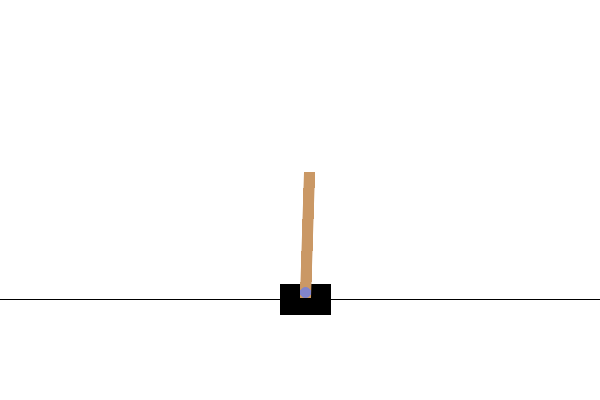

In [ ]:
# Insert your code for Exercise 1 here

import gymnasium as gym
from PIL import Image
from IPython.display import display

# Function to display the environment's state as an image
def display_env_state(env):
    frame = env.render()  # Render the environment's state to a numpy array
    image = Image.fromarray(frame)  # Convert the numpy array to an image
    display(image)  # Display the image

# Create and initialize the MountainCar environment with render mode "rgb_array"
env = gym.make('CartPole-v1', render_mode="rgb_array")
env.reset()

# Display the initial state of the environment
display_env_state(env)

# Close the environment when done
env.close()

### **Exercise 2: Apply**

In [ ]:
# Insert your code for Exercise 2 here

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import os
import numpy as np

# Start virtual display for rendering
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

# Ensure the video folder exists
video_folder = './videos'
os.makedirs(video_folder, exist_ok=True)

# Create the MountainCar environment with specified render mode
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_folder)
env.metadata['render_fps'] = 30

# Reset the environment to start recording
observation, info = env.reset()

# Run the environment until truncated
truncated = False
i = 0
while not truncated:
    i += 1
#    action = 1  # Always push right
    # Randomly select action: 0 (push left) or 1 (push right)
    action = np.random.choice([0, 1])
    observation, reward, terminated, truncated, info = env.step(action)
    # Removed the print statement to suppress Step output

# Close the environment
env.close()

# Ensure the video file exists and handle video display
video_files = glob.glob(os.path.join(video_folder, '*.mp4'))
if not video_files:
    raise RuntimeError("No video files found. Make sure the environment ran successfully and recorded video.")

# Display the video
video = io.open(video_files[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

# Stop the virtual display when done
virtual_display.stop()


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


### **Exercise 3:**

The goal of the **CartPole-v1** environment is to balance a pole on a moving cart for as long as possible by applying forces to move the cart left or right. The task is considered solved when the agent can keep the pole balanced for at least 500 time steps (the maximum allowed steps per episode) without letting the pole fall.

#### **Termination Conditions:**

The episode ends when:
1. The pole's angle deviates too far (falls beyond ±12 degrees from vertical).
2. The cart moves too far to the left or right (cart's position goes beyond ±2.4 units from the center).
3. The time step limit (500 steps) is reached.

The challenge for the agent is to learn an optimal policy that keeps the pole upright and the cart within bounds. Let me know if you'd like help implementing or solving this environment! 🚀

In [ ]:
# Insert your code for Exercise 3 here

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import os
import numpy as np

# Start virtual display for rendering
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

# Ensure the video folder exists
video_folder = './videos'
os.makedirs(video_folder, exist_ok=True)

# Create the Acrobot environment with specified render mode
env = gym.make('CartPole-v1', render_mode="rgb_array")  # Updated for Acrobot-v1
env.metadata['render_fps'] = 30

# Setup the wrapper to record the video
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda episode_id: True)

# Reset the environment to start recording
observation, info = env.reset()

# Run the environment until truncated
truncated = False
action = env.action_space.sample()  # Initial action: Random action sampling

print("Starting truncation...", end="")
while not truncated:
    # Execute a random action
    state, reward, terminated, truncated, info = env.step(action)

    # Adjust action randomly for exploration
    action = env.action_space.sample()  # Continue random action sampling

print("done.")
# Close the environment
env.close()

# Ensure the video file exists and handle video display
video_files = glob.glob(os.path.join(video_folder, '*.mp4'))
if not video_files:
    raise RuntimeError("No video files found. Make sure the environment ran successfully and recorded video.")

# Display the video
video = io.open(video_files[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

# Stop the virtual display when done
virtual_display.stop()


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


Starting truncation...done.


In [ ]:
import gymnasium as gym
import numpy as np

# Hyperparameters
LEARNING_RATE = 0.01
DISCOUNT = 0.95
EPISODES = 2000
SHOW_EVERY = 500
epsilon = 1.0  # Exploration rate
START_EPSILON_DECAY = 1
END_EPSILON_DECAY = EPISODES // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAY - START_EPSILON_DECAY)

# Environment setup
env = gym.make("CartPole-v1")

# Discretization settings (number of bins per state dimension)
DISCRETE_OS_SIZE = [20, 20, 20, 20]  # Four state variables
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE
discrete_os_win_size[1] = 2  # Manually adjust for velocity limits
discrete_os_win_size[3] = 0.5  # Adjust for pole angular velocity

# Initialize Q-table
q_table_cartpole = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

# Helper function to convert continuous states to discrete states
def get_discrete_state_cartpole(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(np.clip(discrete_state, 0, DISCRETE_OS_SIZE - np.array([1, 1, 1, 1])).astype(int))

# Training loop
for episode in range(EPISODES):
    state, _ = env.reset()
    discrete_state = get_discrete_state_cartpole(state)
    done = False

    while not done:
        # Choose action: explore or exploit
        if np.random.random() > epsilon:
            action = np.argmax(q_table_cartpole[discrete_state])  # Exploit
        else:
            action = np.random.randint(0, env.action_space.n)  # Explore

        # Take action and observe the result
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        new_discrete_state = get_discrete_state_cartpole(new_state)

        # Update Q-value
        if not done:
            max_future_q = np.max(q_table_cartpole[new_discrete_state])
            current_q = q_table_cartpole[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table_cartpole[discrete_state + (action,)] = new_q
        elif terminated:
            q_table_cartpole[discrete_state + (action,)] = 0  # Terminal state

        discrete_state = new_discrete_state

    # Decay epsilon to reduce exploration over time
    if START_EPSILON_DECAY <= episode <= END_EPSILON_DECAY:
        epsilon -= epsilon_decay_value

    # Render the environment every SHOW_EVERY episodes
    if episode % SHOW_EVERY == 0:
        print(f"Episode: {episode}")
        env.render()

env.close()
print("Training complete!")


Episode: 0


/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode: 500
Episode: 1000
Episode: 1500
Training complete!


In [ ]:
# Import necessary libraries
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Define the video recording wrapper
video_callable = lambda episode_id: True  # Record all episodes
env = RecordVideo(env, video_folder='./videos', episode_trigger=video_callable)

# Function to run a trained agent using the Q-table
def run_game_cartpole(q_table_cartpole, render=True):
    observation, _ = env.reset()
    discrete_state = get_discrete_state_cartpole(observation)
    done = False
    while not done:
        if render:
            env.render()
        # Select the best action using the Q-table
        action = np.argmax(q_table_cartpole[discrete_state])
        new_observation, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        discrete_state = get_discrete_state_cartpole(new_observation)

# Run the trained agent with the recorded video
run_game_cartpole(q_table_cartpole, render=True)

# Close the environment
env.close()

# Display the video
video_files = glob.glob('./videos/*.mp4')
if not video_files:
    raise RuntimeError("No video files found. Make sure the environment ran successfully and recorded video.")

# Embed the video into the notebook
video = io.open(video_files[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))


## **Reinforcement Learning**

## **Inspecting the Q-Table**

We can also display the Q-table. The following code shows the agent's action for each environment state. As the weights of a neural network, this table is not straightforward to interpret. Some patterns do emerge in that direction, as seen by calculating the means of rows and columns. The actions seem consistent at both velocity and position's upper and lower halves.

In [ ]:
print(q_table_cartpole)

In [ ]:
df_cartpole_1 = pd.DataFrame(q_table_cartpole.argmax(axis=3).flatten(), columns=["Best Action"])

df_cartpole_1

,Best Action
0,13
1,8
2,7
3,14
4,6
...,...
15995,17
15996,7
15997,5
15998,14


## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Class_06_1.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

## **IBM PC**

![__](https://upload.wikimedia.org/wikipedia/commons/a/a6/IBM_PC-IMG_7271_%28transparent%29.png)

The **IBM Personal Computer** (model 5150, commonly known as the IBM PC) is the first microcomputer released in the IBM PC model line and the basis for the IBM PC compatible _de facto_ standard. Released on August 12, 1981, it was created by a team of engineers and designers at International Business Machines (IBM), directed by William C. Lowe and Philip Don Estridge in Boca Raton, Florida.

Powered by an x86-architecture Intel 8088 processor, the machine was based on open architecture and third-party peripherals. Over time, expansion cards and software technology increased to support it. The PC had a substantial influence on the personal computer market; the specifications of the IBM PC became one of the most popular computer design standards in the world. The only significant competition it faced from a non-compatible platform throughout the 1980s was from Apple's Macintosh product line, as well as consumer-grade platforms created by companies like Commodore and Atari. Most present-day personal computers share architectural features in common with the original IBM PC, including the Intel-based Mac computers manufactured from 2006 to 2022.

**History**

Prior to the 1980s, IBM had largely been known as a provider of business computer systems. As the 1980s opened, their market share in the growing minicomputer market failed to keep up with competitors, while other manufacturers were beginning to see impressive profits in the microcomputer space. The market for personal computers was dominated at the time by Tandy, Commodore, and Apple, whose machines sold for several hundred dollars each and had become very popular. The microcomputer market was large enough for IBM's attention, with \$15 billion in sales by 1979 and projected annual growth of more than 40% during the early 1980s. Other large technology companies had entered it, such as Hewlett-Packard, Texas Instruments and Data General, and some large IBM customers were buying Apples.

As early as 1980 there were rumors of IBM developing a personal computer, possibly a miniaturized version of the IBM System/370, and Matsushita acknowledged publicly that it had discussed with IBM the possibility of manufacturing a personal computer in partnership, although this project was abandoned. The public responded to these rumors with skepticism, owing to IBM's tendency towards slow-moving, bureaucratic business practices tailored towards the production of large, sophisticated and expensive business systems As with other large computer companies, its new products typically required about four to five years for development, and a well publicized quote from an industry analyst was, "IBM bringing out a personal computer would be like teaching an elephant to tap dance."

IBM had previously produced microcomputers, such as 1975's IBM 5100, but targeted them towards businesses; the 5100 had a price tag as high as \$20,000. Their entry into the home computer market needed to be competitively priced.

In the summer of 1979, Ron Mion, IBM’s Senior Business Trends Advisor for entry-level systems, proposed a plan for IBM to enter the emerging microcomputer market. At that time, the likes of Apple and Tandy were starting to encroach on the small-business marketplace that IBM intended to dominate. Mion believed that that market would grow significantly and that IBM should aggressively pursue it. However, he felt that they wouldn’t be successful unless IBM departed from its long-standing business model.